## A Friendly Introduction to Data Science and Machine Learning
#### In this notebook we will estimate the value of Absolute Zero (the coldest temperature in the universe)

#### Our data consists of readings of Temperature vs Pressure. To estimate the Absolute Zero we just need to find which temperature would have zero pressure. And since there's no such things as negative pressure it's physically impossible for the temperature to go bellow that point.

#### You will see that even with a very small sample our predition won't be too far from the actual value

#### Let's start!

In [1]:
# Importing Libraries
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

We will get our data directly from the website carolina.com
https://www.carolina.com/teacher-resources/Interactive/gay-lussacs-law-temperature-pressure-relationship-in-gases-determination-absolute-zero/tr10730.tr

In [2]:
study_tables = pd.read_html('https://www.carolina.com/teacher-resources/Interactive/gay-lussacs-law-temperature-pressure-relationship-in-gases-determination-absolute-zero/tr10730.tr')
# df stands for data frame
df = study_tables[2]
df

,0,1,2,3,4
0,Reading No.,Type of Bath Used,Temperature (°C),Temperature (°K),Pressure (mm Hg)
1,1,Boiling water,100.0,373.1,945
2,2,Boiling water + room temp. water,53.0,326.1,840
3,3,Room temp. water,21.0,294.1,765
4,4,Ice water,0.0,273.1,720
5,5,Dry ice/ethanol (or acetone),–78.5,NaN,NaN
6,6,Liquid nitrogen,–195.7,77.4,225


There's more information in this data frame than we actually need. Let's get rid of reading no., type of bath used and temperature in kelvin.

In [3]:
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df = df[['Temperature  (°C)', 'Pressure (mm Hg)']]
df.columns = ['Temp', 'Pressure']
df

,Temp,Pressure
1,100.0,945
2,53.0,840
3,21.0,765
4,0.0,720
5,–78.5,NaN
6,–195.7,225


In order to plot the values in a graph, they have to be either integer or floats, but in our table they're strings. Let's change that.

In [4]:
df.dtypes

Temp        object
Pressure    object
dtype: object

In [5]:
df = df.replace('–','-',   regex=True).apply(pd.to_numeric)
df.dtypes

Temp        float64
Pressure    float64
dtype: object

(0, 1100)

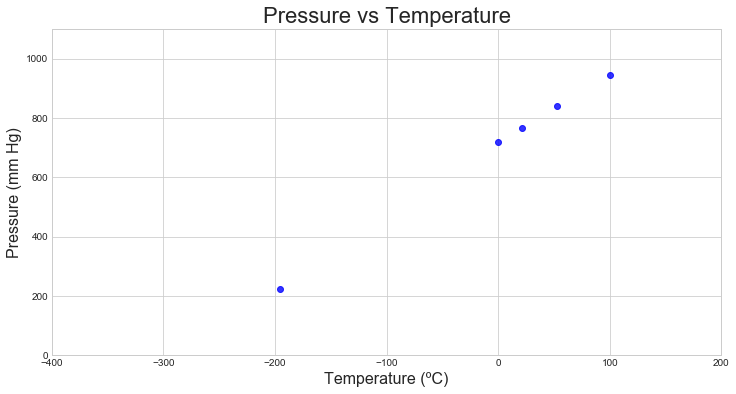

In [6]:
fig = plt.figure(figsize=(12,6))

sns.regplot('Temp', 'Pressure', df, color='b', fit_reg=False)

plt.xlabel('Temperature (ºC)', fontsize=16)
plt.ylabel('Pressure (mm Hg)', fontsize=16)
plt.title('Pressure vs Temperature', fontsize=22)

pylab.xlim([-400, 200])
pylab.ylim([0, 1100])

Notice that we have 6 rows of data, but one of our rows has a null value. Looking at the graph above we can roughly estimate the missing value and plot it again. What value would you chose?

Before we continue, see if you can guess the value of Absolute Zero. Whatever you're doing in your head is going to be similar to how the Machine Learning model "thinks".

In [7]:
df['Pressure'][5] = 500
df

,Temp,Pressure
1,100.0,945.0
2,53.0,840.0
3,21.0,765.0
4,0.0,720.0
5,-78.5,500.0
6,-195.7,225.0


(0, 1100)

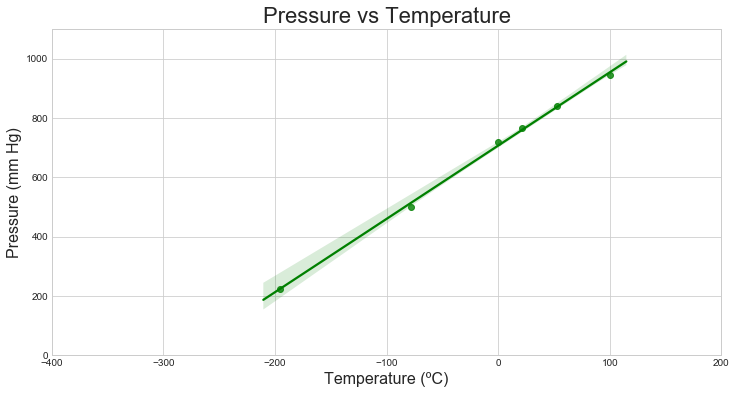

In [8]:
fig = plt.figure(figsize=(12,6))

sns.regplot('Temp', 'Pressure', df, color='g')

plt.xlabel('Temperature (ºC)', fontsize=16)
plt.ylabel('Pressure (mm Hg)', fontsize=16)
plt.title('Pressure vs Temperature', fontsize=22)

pylab.xlim([-400, 200])
pylab.ylim([0, 1100])

Notice how our estimative for the missing value was spot on! I chose 500 becaue I imagined a line linking the points of the first graph. Now we can see that same line from the computer's perspective.

The fact that our data lines up as a straight line hints for a linear relationship. Let's follow the hint and implement a linear regression model.

Now to create a linear regression machine learning model we will import LinearRegression from the Scikit-Learn library and define our X (Pressure) and y (Temperature) parameters for the function y = f(X)

We are calling X = Pressure and not the other way around, because we already know the value of Pressure (Zero) for Absolute Zero.

In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = df['Pressure'][:, None]
y = df['Temp']

Now we will split our data in training data and testing data.
More information on why can be found here:
https://www.quora.com/In-machine-learning-what-s-the-purpose-of-splitting-data-up-into-test-sets-and-training-sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

Finally we can fit the model to our data and predict it's results

In [11]:
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [12]:
y_test = y_test.as_matrix()

for i in range(len(predictions)):
    print(f'True vs Predicted: {y_test[i]} | {round(predictions[i],2)}')

True vs Predicted: 100.0 | 99.49
True vs Predicted: -195.7 | -217.41
True vs Predicted: -78.5 | -96.37


/Users/Alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


We can see that this is not a very good model. But let's predict the temperature for the case where pressure is equal to zero anyway.

In [13]:
lm.predict(0)

array([-316.43877551])

-316ºC for Absolute Zero, that's more than 30ºC off from the real value of -273ºC.
That's okay, because we used only 3 values to train the model. Let's try again with the entire set and see if we can do better.

In [14]:
lm2 = LinearRegression()
lm2.fit(X, y)
lm2.predict(0)

array([-285.69508075])

### Here it is! According to our model Absolute Zero is -285ºC, which is pretty close to the actual value of -273ºC.

### Keep in mind that we only used a very small dataset. It's not uncommon to have a much larger data to work with, like hundreds of thousands of rows (in cases like this doing a train test split would make more sense).

### I hope you enjoyed!